In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('df_feats_sample.csv', index_col=0)
df.drop(columns='TARGET', inplace=True)
index1500 = [i for i in range(0,1500)]
df.index = index1500
df_features = pd.read_csv('features174 meanings.csv', sep=';', header=None)
df_feats = pd.read_csv('feats_sample_shap_values_lgb.csv', index_col=0)

sk_id = 362153

In [3]:
df_features.columns=['TAG_FEAT', 'Meaning']

In [4]:
df_features

,TAG_FEAT,Meaning
0,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,Mean of : Maximal amount overdue on the Credit...
1,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,Max of : Current credit limit of credit card r...
2,ACTIVE_AMT_CREDIT_SUM_MEAN,Mean of : Current credit amount for the Credit...
3,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,Mean of : Remaining duration of CB credit (in ...
4,ACTIVE_DAYS_CREDIT_ENDDATE_MIN,Min of : Remaining duration of CB credit (in d...
...,...,...
168,WALLSMATERIAL_MODE_Monolithic,Modus of : Normalized information about buildi...
169,WALLSMATERIAL_MODE_Panel,Modus of : Normalized information about buildi...
170,YEARS_BEGINEXPLUATATION_MODE,Modus of : Normalized information about buildi...
171,YEARS_BUILD_MEDI,Median of : Normalized information about build...


In [11]:
explainer_shap = -0.5813475526725127

In [12]:
class ShapObject:

    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names


ind=df[df.SK_ID_CURR==int(sk_id)].index.values[0]
shap_object = ShapObject(base_values = explainer_shap,
                         values = df_feats.loc[ind].values,
                         feature_names = df.columns,
                         data = df.iloc[ind,:])



In [53]:
df_shap=pd.DataFrame(np.abs(df_feats.loc[ind].values), df.columns, columns=['shap'])

In [54]:
list_shap_feats = list(df_shap.sort_values(by='shap', ascending=False).head(20).index)
list_shap_feats = sorted(list_shap_feats)
df_features[df_features.TAG_FEAT.isin(list_shap_feats)]

,TAG_FEAT,Meaning
8,AMT_ANNUITY,Loan annuity
10,AMT_GOODS_PRICE,For consumer loans it is the price of the good...
17,APPROVED_CNT_PAYMENT_MEAN,Mean of : Term of previous credit at applicati...
20,BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,Mean of : Maximal amount overdue on the Credit...
21,BURO_AMT_CREDIT_SUM_DEBT_MEAN,Mean of : Current debt on Credit Bureau credit
52,CODE_GENDER,Gender of the client
55,DAYS_BIRTH,Client's age in days at the time of application
56,DAYS_EMPLOYED_PERC,How many days before the application the perso...
64,EXT_SOURCE_1,Normalized score from external data source 1
65,EXT_SOURCE_2,Normalized score from external data source 2


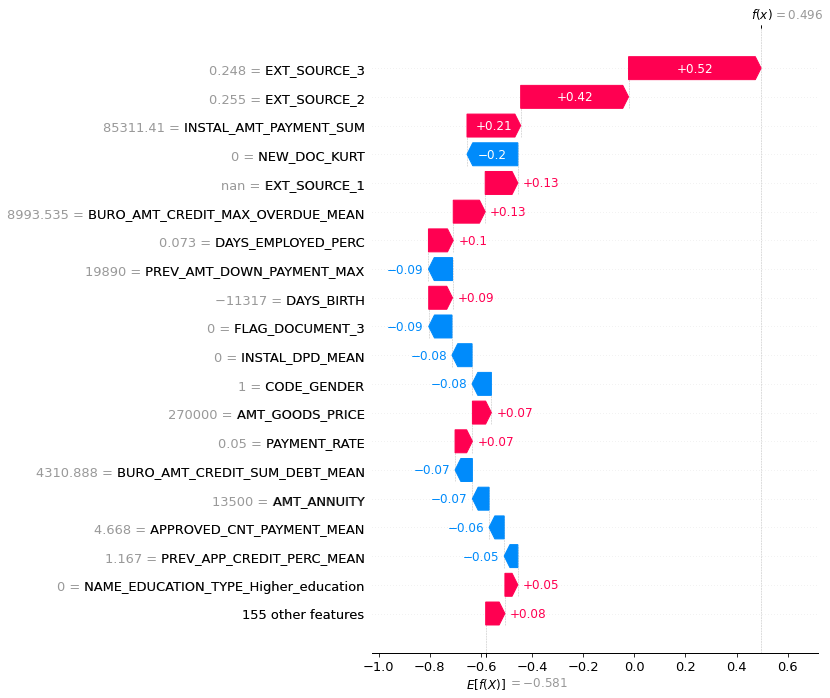

In [55]:
shap.waterfall_plot(shap_object, max_display=20)

In [7]:
list_SK_ID_CURR = df.SK_ID_CURR

In [10]:
df_applica = pd.read_csv('dataset/application_train.csv')
df_applica.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_applica_sample = df_applica[df_applica.SK_ID_CURR.isin(list_SK_ID_CURR)].copy()

In [15]:
df_applica_sample.to_csv("df_application_sample.csv")